In [159]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [160]:
data = pd.read_csv('Canadian_Housing_Survey_(CHS)_results_for_Ottawa_level_2018_and_2021_.csv')

In [161]:
data.head()

,year,theme,qid_key,qid,qheader,qsub,socio_group,group_,response,num,denom,percent_,Quality,ObjectId
0,2021,Financial pressures,11,9,[Among those who skipped or delayed a mortgage...,NaN,Education,University certificate,No,16300.0,17000,95.9,Good,1
1,2018,Financial pressures,11,9,[Among those who skipped or delayed a mortgage...,NaN,Education,University certificate,No,10800.0,13300,81.2,Good,2
2,2018,Financial pressures,11,9,[Among those who skipped or delayed a mortgage...,NaN,Racial identity,Racialized,No,20900.0,25700,81.3,Good,3
3,2021,Financial pressures,11,9,[Among those who skipped or delayed a mortgage...,NaN,Racial identity,Racialized,No,39800.0,43200,92.1,Good,4
4,2018,Financial pressures,46,42,Is any member of your household currently on a...,NaN,Sexual orientation,LGBTQ2S+,No,38000.0,38000,100.0,Good,5


In [162]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3014 entries, 0 to 3013
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         3014 non-null   int64  
 1   theme        3014 non-null   object 
 2   qid_key      3014 non-null   int64  
 3   qid          3014 non-null   int64  
 4   qheader      3014 non-null   object 
 5   qsub         1859 non-null   object 
 6   socio_group  2846 non-null   object 
 7   group_       3014 non-null   object 
 8   response     3014 non-null   object 
 9   num          2948 non-null   float64
 10  denom        3014 non-null   int64  
 11  percent_     2948 non-null   float64
 12  Quality      2516 non-null   object 
 13  ObjectId     3014 non-null   int64  
dtypes: float64(2), int64(5), object(7)
memory usage: 329.8+ KB


In [163]:
data.size

42196

In [164]:
data.columns

Index(['year', 'theme', 'qid_key', 'qid', 'qheader', 'qsub', 'socio_group',
       'group_', 'response', 'num', 'denom', 'percent_', 'Quality',
       'ObjectId'],
      dtype='object')

In [165]:
# Check for missing values in each column
data.isnull().sum()

year              0
theme             0
qid_key           0
qid               0
qheader           0
qsub           1155
socio_group     168
group_            0
response          0
num              66
denom             0
percent_         66
Quality         498
ObjectId          0
dtype: int64

In [166]:
data.isnull().sum()

year              0
theme             0
qid_key           0
qid               0
qheader           0
qsub           1155
socio_group     168
group_            0
response          0
num              66
denom             0
percent_         66
Quality         498
ObjectId          0
dtype: int64

In [168]:
# Check the count of the unique values in the 'Quality' column to assess data quality
data['Quality'].value_counts(dropna=False)

Quality
Good                1927
NaN                  498
Use with caution     265
Acceptable           249
Suppressed            75
Name: count, dtype: int64

In [169]:
# Assuming we want to proceed with data marked as 'Good' in the Quality column
data_cleaned = data[data['Quality'] == 'Good']

In [170]:
# Drop rows with missing values in critical columns (e.g., 'num', 'denom', 'percent_')
data_cleaned = data_cleaned.dropna(subset=['num', 'denom', 'percent_'])


In [171]:
# Recalculate 'percent_' to ensure accuracy (if needed)
data_cleaned['percent_'] = (data_cleaned['num'] / data_cleaned['denom']) * 100

In [172]:
#checking the columns to confirm only qsub and socio group have na values
data_cleaned.isnull().sum()

year             0
theme            0
qid_key          0
qid              0
qheader          0
qsub           881
socio_group    119
group_           0
response         0
num              0
denom            0
percent_         0
Quality          0
ObjectId         0
dtype: int64

In [173]:
# Check the shape of the cleaned data to see how many rows and columns are left
data_cleaned.shape


(1926, 14)

In [174]:

# Display the first few rows of the cleaned data to verify the process
data_cleaned.head()


,year,theme,qid_key,qid,qheader,qsub,socio_group,group_,response,num,denom,percent_,Quality,ObjectId
0,2021,Financial pressures,11,9,[Among those who skipped or delayed a mortgage...,NaN,Education,University certificate,No,16300.0,17000,95.882353,Good,1
1,2018,Financial pressures,11,9,[Among those who skipped or delayed a mortgage...,NaN,Education,University certificate,No,10800.0,13300,81.203008,Good,2
2,2018,Financial pressures,11,9,[Among those who skipped or delayed a mortgage...,NaN,Racial identity,Racialized,No,20900.0,25700,81.322957,Good,3
3,2021,Financial pressures,11,9,[Among those who skipped or delayed a mortgage...,NaN,Racial identity,Racialized,No,39800.0,43200,92.129630,Good,4
4,2018,Financial pressures,46,42,Is any member of your household currently on a...,NaN,Sexual orientation,LGBTQ2S+,No,38000.0,38000,100.000000,Good,5


`qsub` __assumptions__ will have to be made for qsub column because there are alot of missing data and the column cannot directly be removed 
yet because it contains data about 
data_cleaned = data_cleaned.drop(columns='qsub')
data_cleaned.head()

Does not matter since we are only focused on data marked as `good`

In [175]:
# save the new cleaned data and set the index to false to avoid the index to be saved as a new column
data_cleaned.to_csv('clean_housing_data.csv', index = False)

In [176]:
# Filter data for financial pressures theme
financial_pressures = data_cleaned[data_cleaned['theme'] == 'Financial pressures']
financial_pressures.shape

(450, 14)

In [177]:
financial_pressures['group_'].value_counts()

group_
Total                                                                             52
Female                                                                            50
Male                                                                              50
Non-racialized                                                                    49
Racialized                                                                        46
Heterosexual                                                                      44
High school diploma or a equivalency certificate                                  41
University certificate                                                            39
Trade certificate, diploma, college, CEGEP or other non-university certificate    38
Less than high school diploma or its equivalent                                   29
LGBTQ2S+                                                                          12
Name: count, dtype: int64

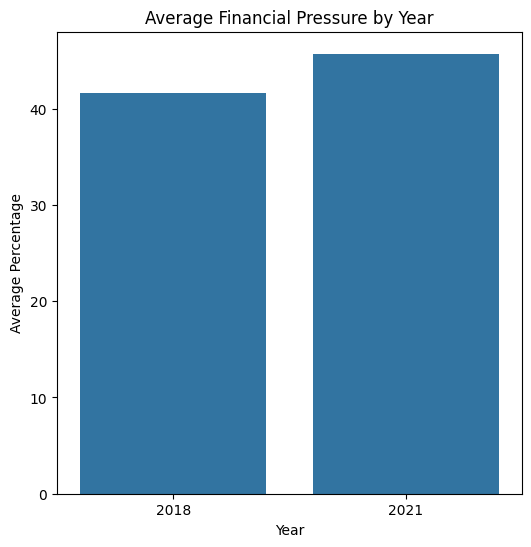

In [178]:
# Filter data for financial pressures theme
financial_pressures = data_cleaned[data_cleaned['theme'] == 'Financial pressures']

# Group by year and calculate average percentage of respondents facing financial pressures
avg_financial_pressure_by_year = financial_pressures.groupby('year')['percent_'].mean().reset_index()


# Plotting
plt.figure(figsize=(6, 6))
sns.barplot(x='year', y='percent_', data=avg_financial_pressure_by_year)
plt.title('Average Financial Pressure by Year')
plt.xlabel('Year')
plt.ylabel('Average Percentage')
plt.show()


In [188]:
avg_financial_pressure_by_year = financial_pressures.groupby('year')['percent_'].mean().reset_index()
avg_financial_pressure_by_year.to_csv('avg_financial_pressure_by_year.csv')
avg_financial_pressure_by_year.head()


,year,percent_
0,2018,41.597456
1,2021,45.697795


In [180]:
# financial pressure for EDI/DEI groups by year
dei_groups = [
    'Racialized',
    'Female',
    'LGBTQ2S+' ]

financial_pressures_DEI = financial_pressures[financial_pressures['group_'].isin(dei_groups)]
avg_financial_pressure_by_year_DEI = financial_pressures_DEI.groupby('year')['percent_'].mean().reset_index()

avg_financial_pressure_by_year_DEI.to_csv('Average_financial_pressures_DEI.csv')
avg_financial_pressure_by_year_DEI.shape

(2, 2)

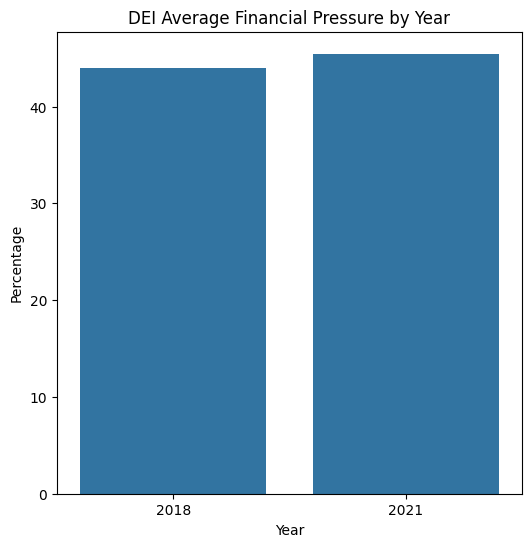

In [181]:
# Filter data for DEI financial pressures theme by year 
financial_pressures_DEI = financial_pressures[financial_pressures['group_'].isin(dei_groups)]
avg_financial_pressure_by_year_DEI = financial_pressures_DEI.groupby('year')['percent_'].mean().reset_index()

# Plotting
plt.figure(figsize=(6, 6))
sns.barplot(x='year', y='percent_', data=avg_financial_pressure_by_year_DEI)
plt.title('DEI Average Financial Pressure by Year')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.show()

In [182]:
# Adjusting the theme filter
housing_quality_needs = data_cleaned[data_cleaned['theme'] == 'Housing quality & needs']
housing_quality_needs.to_csv('housing_quality_needs.csv')
housing_quality_needs.shape

(255, 14)

In [183]:
housing_quality_needs.head()

,year,theme,qid_key,qid,qheader,qsub,socio_group,group_,response,num,denom,percent_,Quality,ObjectId
400,2018,Housing quality & needs,54,48,Does your dwelling have all the adaptations th...,NaN,Education,University certificate,Yes,20200.0,34800,58.045977,Good,401
401,2018,Housing quality & needs,54,48,Does your dwelling have all the adaptations th...,NaN,Racial identity,Racialized,Yes,12000.0,25100,47.808765,Good,402
402,2018,Housing quality & needs,53,47,Does any member of your household have a physi...,NaN,Sexual orientation,LGBTQ2S+,No,17800.0,19800,89.898990,Good,403
404,2018,Housing quality & needs,53,47,Does any member of your household have a physi...,NaN,Sex,Female,No,488200.0,532200,91.732431,Good,405
405,2018,Housing quality & needs,53,47,Does any member of your household have a physi...,NaN,Sexual orientation,Heterosexual,No,358500.0,388600,92.254246,Good,406


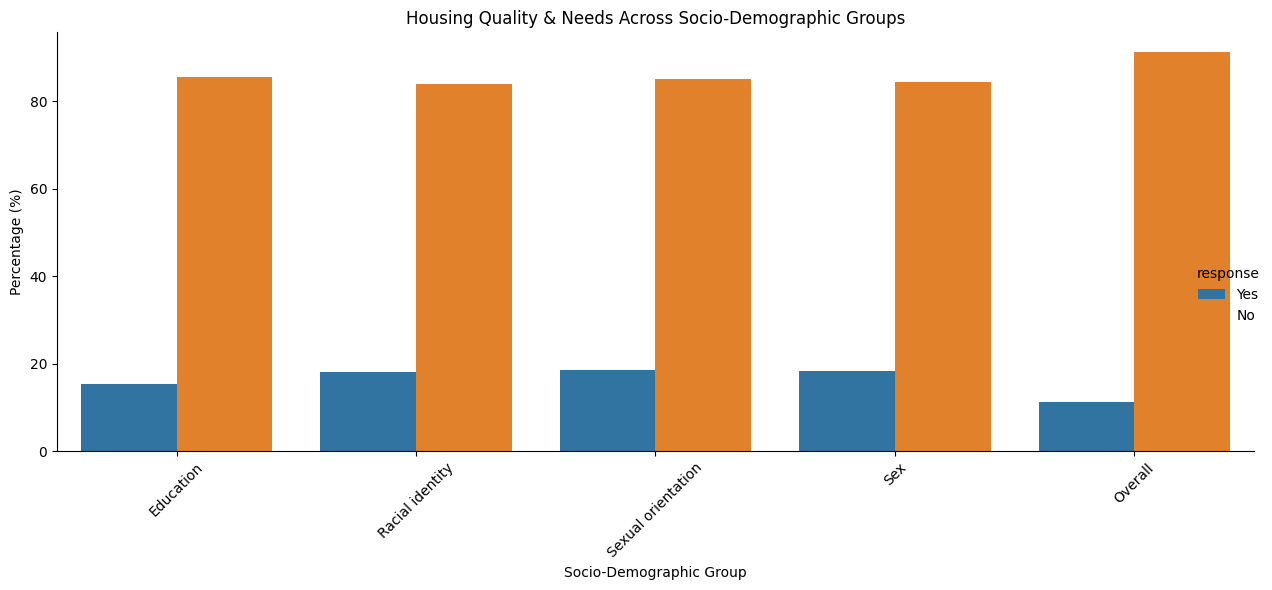

In [184]:
# Assuming 'response' column indicates adequacy, with responses like 'Adequate' and 'Inadequate'
sns.catplot(data=housing_quality_needs, kind="bar", x="socio_group", y="percent_", hue="response", errorbar=None, height=6, aspect=2)
plt.title('Housing Quality & Needs Across Socio-Demographic Groups')
plt.xticks(rotation=45)
plt.ylabel('Percentage (%)')
plt.xlabel('Socio-Demographic Group')
plt.tight_layout()
plt.show()

In [185]:
housing_quality_needs['group_'].value_counts()

group_
Total                                                                             28
Racialized                                                                        27
Female                                                                            26
Male                                                                              25
Non-racialized                                                                    25
University certificate                                                            24
Heterosexual                                                                      24
High school diploma or a equivalency certificate                                  23
Trade certificate, diploma, college, CEGEP or other non-university certificate    23
Less than high school diploma or its equivalent                                   19
LGBTQ2S+                                                                          11
Name: count, dtype: int64

In [186]:
#filtering for DEI groups only in the group_ column
dei_groups = [
    'Racialized',
    'Female',
    'LGBTQ2S+'
]
housing_quality_needs_DEI = housing_quality_needs[housing_quality_needs['group_'].isin(dei_groups)]
housing_quality_needs_DEI.to_csv('housing_quality_needs_DEI.csv')
housing_quality_needs_DEI.head()

,year,theme,qid_key,qid,qheader,qsub,socio_group,group_,response,num,denom,percent_,Quality,ObjectId
401,2018,Housing quality & needs,54,48,Does your dwelling have all the adaptations th...,NaN,Racial identity,Racialized,Yes,12000.0,25100,47.808765,Good,402
402,2018,Housing quality & needs,53,47,Does any member of your household have a physi...,NaN,Sexual orientation,LGBTQ2S+,No,17800.0,19800,89.898990,Good,403
404,2018,Housing quality & needs,53,47,Does any member of your household have a physi...,NaN,Sex,Female,No,488200.0,532200,91.732431,Good,405
418,2018,Housing quality & needs,53,47,Does any member of your household have a physi...,NaN,Racial identity,Racialized,No,259200.0,285000,90.947368,Good,419
419,2018,Housing quality & needs,54,48,Does your dwelling have all the adaptations th...,NaN,Sex,Female,No,21100.0,43300,48.729792,Good,420


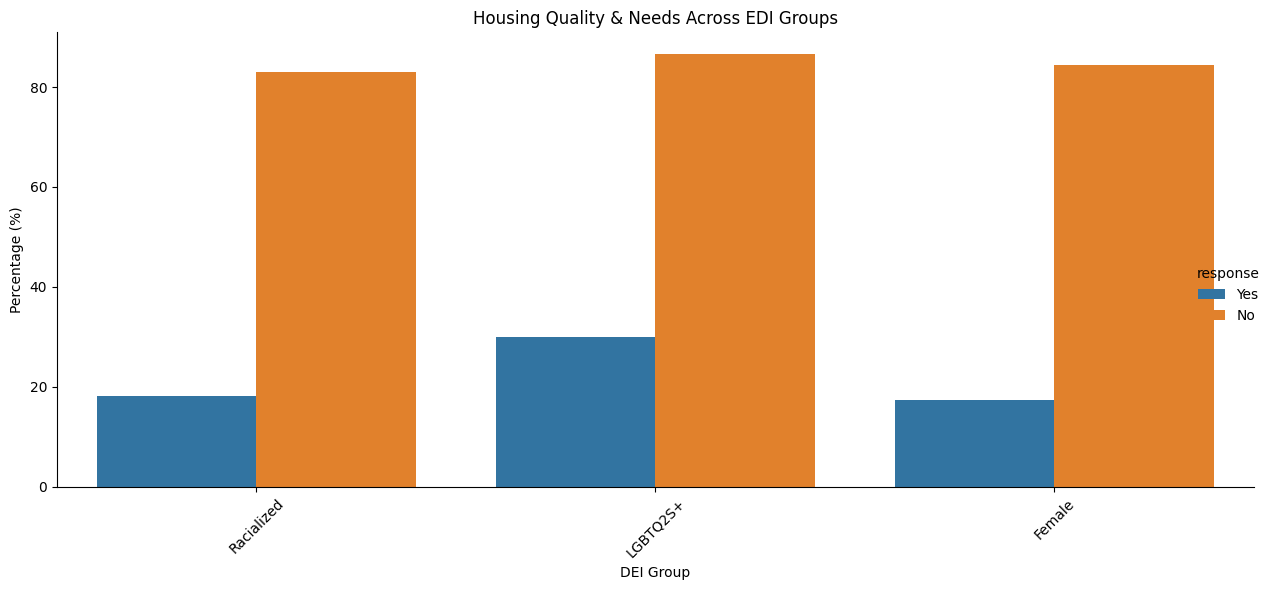

In [187]:
# housing quality and needs by DEI groups 
# Assuming 'response' column indicates adequacy, with responses like 'Adequate' and 'Inadequate'
sns.catplot(data=housing_quality_needs_DEI, kind="bar", x="group_", y="percent_", hue="response", errorbar=None, height=6, aspect=2)
plt.title('Housing Quality & Needs Across EDI Groups')
plt.xticks(rotation=45)
plt.ylabel('Percentage (%)')
plt.xlabel('DEI Group')
plt.tight_layout()
plt.show()